--- 
### Importando-Pacotes
--- 

In [108]:
import numpy as np
import pandas as pd
# from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

--- 
### Importando-Dataframe:
--- 

In [109]:
df = pd.read_csv("dataset/breast-cancer.csv")

--- 
### Verificação do Dataset
--- 

In [110]:
df.info() # Verificando se a campos com valor nulo, nenhum encontrado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


--- 
### Tratamento-de-Dados:
--- 

In [112]:
# Removendo a coluna de ids

df = df.drop(columns=["id"])

In [113]:
# Codificando os valores **qualitativos** (utilizado posteriormente para a **matriz de correlação**)

le = LabelEncoder()

df_num = df.copy(deep=True)

for atr in df_num.columns:
    df_num[atr] = le.fit_transform(df_num[atr].astype(str))

display(df['diagnosis'].head())
display(df_num['diagnosis'].head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [114]:
display(df['diagnosis'].head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [115]:
display(df_num['diagnosis'].head)

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

--- 
### Histogramas-Dataframe:
--- 

In [116]:
# df_sem_id = df.iloc[:, 1:]  # ignora a primeira coluna (índice 0)

# for coluna in df_sem_id.select_dtypes(include=['number']).columns:
#     plt.figure(figsize=(6, 4))
#     plt.hist(df_sem_id[coluna].dropna(), bins=10, color='skyblue', edgecolor='black')
#     plt.title(f'Histograma da coluna: {coluna}')
#     plt.xlabel(coluna)
#     plt.ylabel('Frequência')
#     plt.grid(True, linestyle='--', alpha=0.6)
#     plt.tight_layout()
#     plt.show()

[[<Axes: title={'center': 'radius_mean'}>
  <Axes: title={'center': 'texture_mean'}>
  <Axes: title={'center': 'perimeter_mean'}>
  <Axes: title={'center': 'area_mean'}>
  <Axes: title={'center': 'smoothness_mean'}>]
 [<Axes: title={'center': 'compactness_mean'}>
  <Axes: title={'center': 'concavity_mean'}>
  <Axes: title={'center': 'concave points_mean'}>
  <Axes: title={'center': 'symmetry_mean'}>
  <Axes: title={'center': 'fractal_dimension_mean'}>]
 [<Axes: title={'center': 'radius_se'}>
  <Axes: title={'center': 'texture_se'}>
  <Axes: title={'center': 'perimeter_se'}>
  <Axes: title={'center': 'area_se'}>
  <Axes: title={'center': 'smoothness_se'}>]
 [<Axes: title={'center': 'compactness_se'}>
  <Axes: title={'center': 'concavity_se'}>
  <Axes: title={'center': 'concave points_se'}>
  <Axes: title={'center': 'symmetry_se'}>
  <Axes: title={'center': 'fractal_dimension_se'}>]
 [<Axes: title={'center': 'radius_worst'}>
  <Axes: title={'center': 'texture_worst'}>
  <Axes: title={'ce

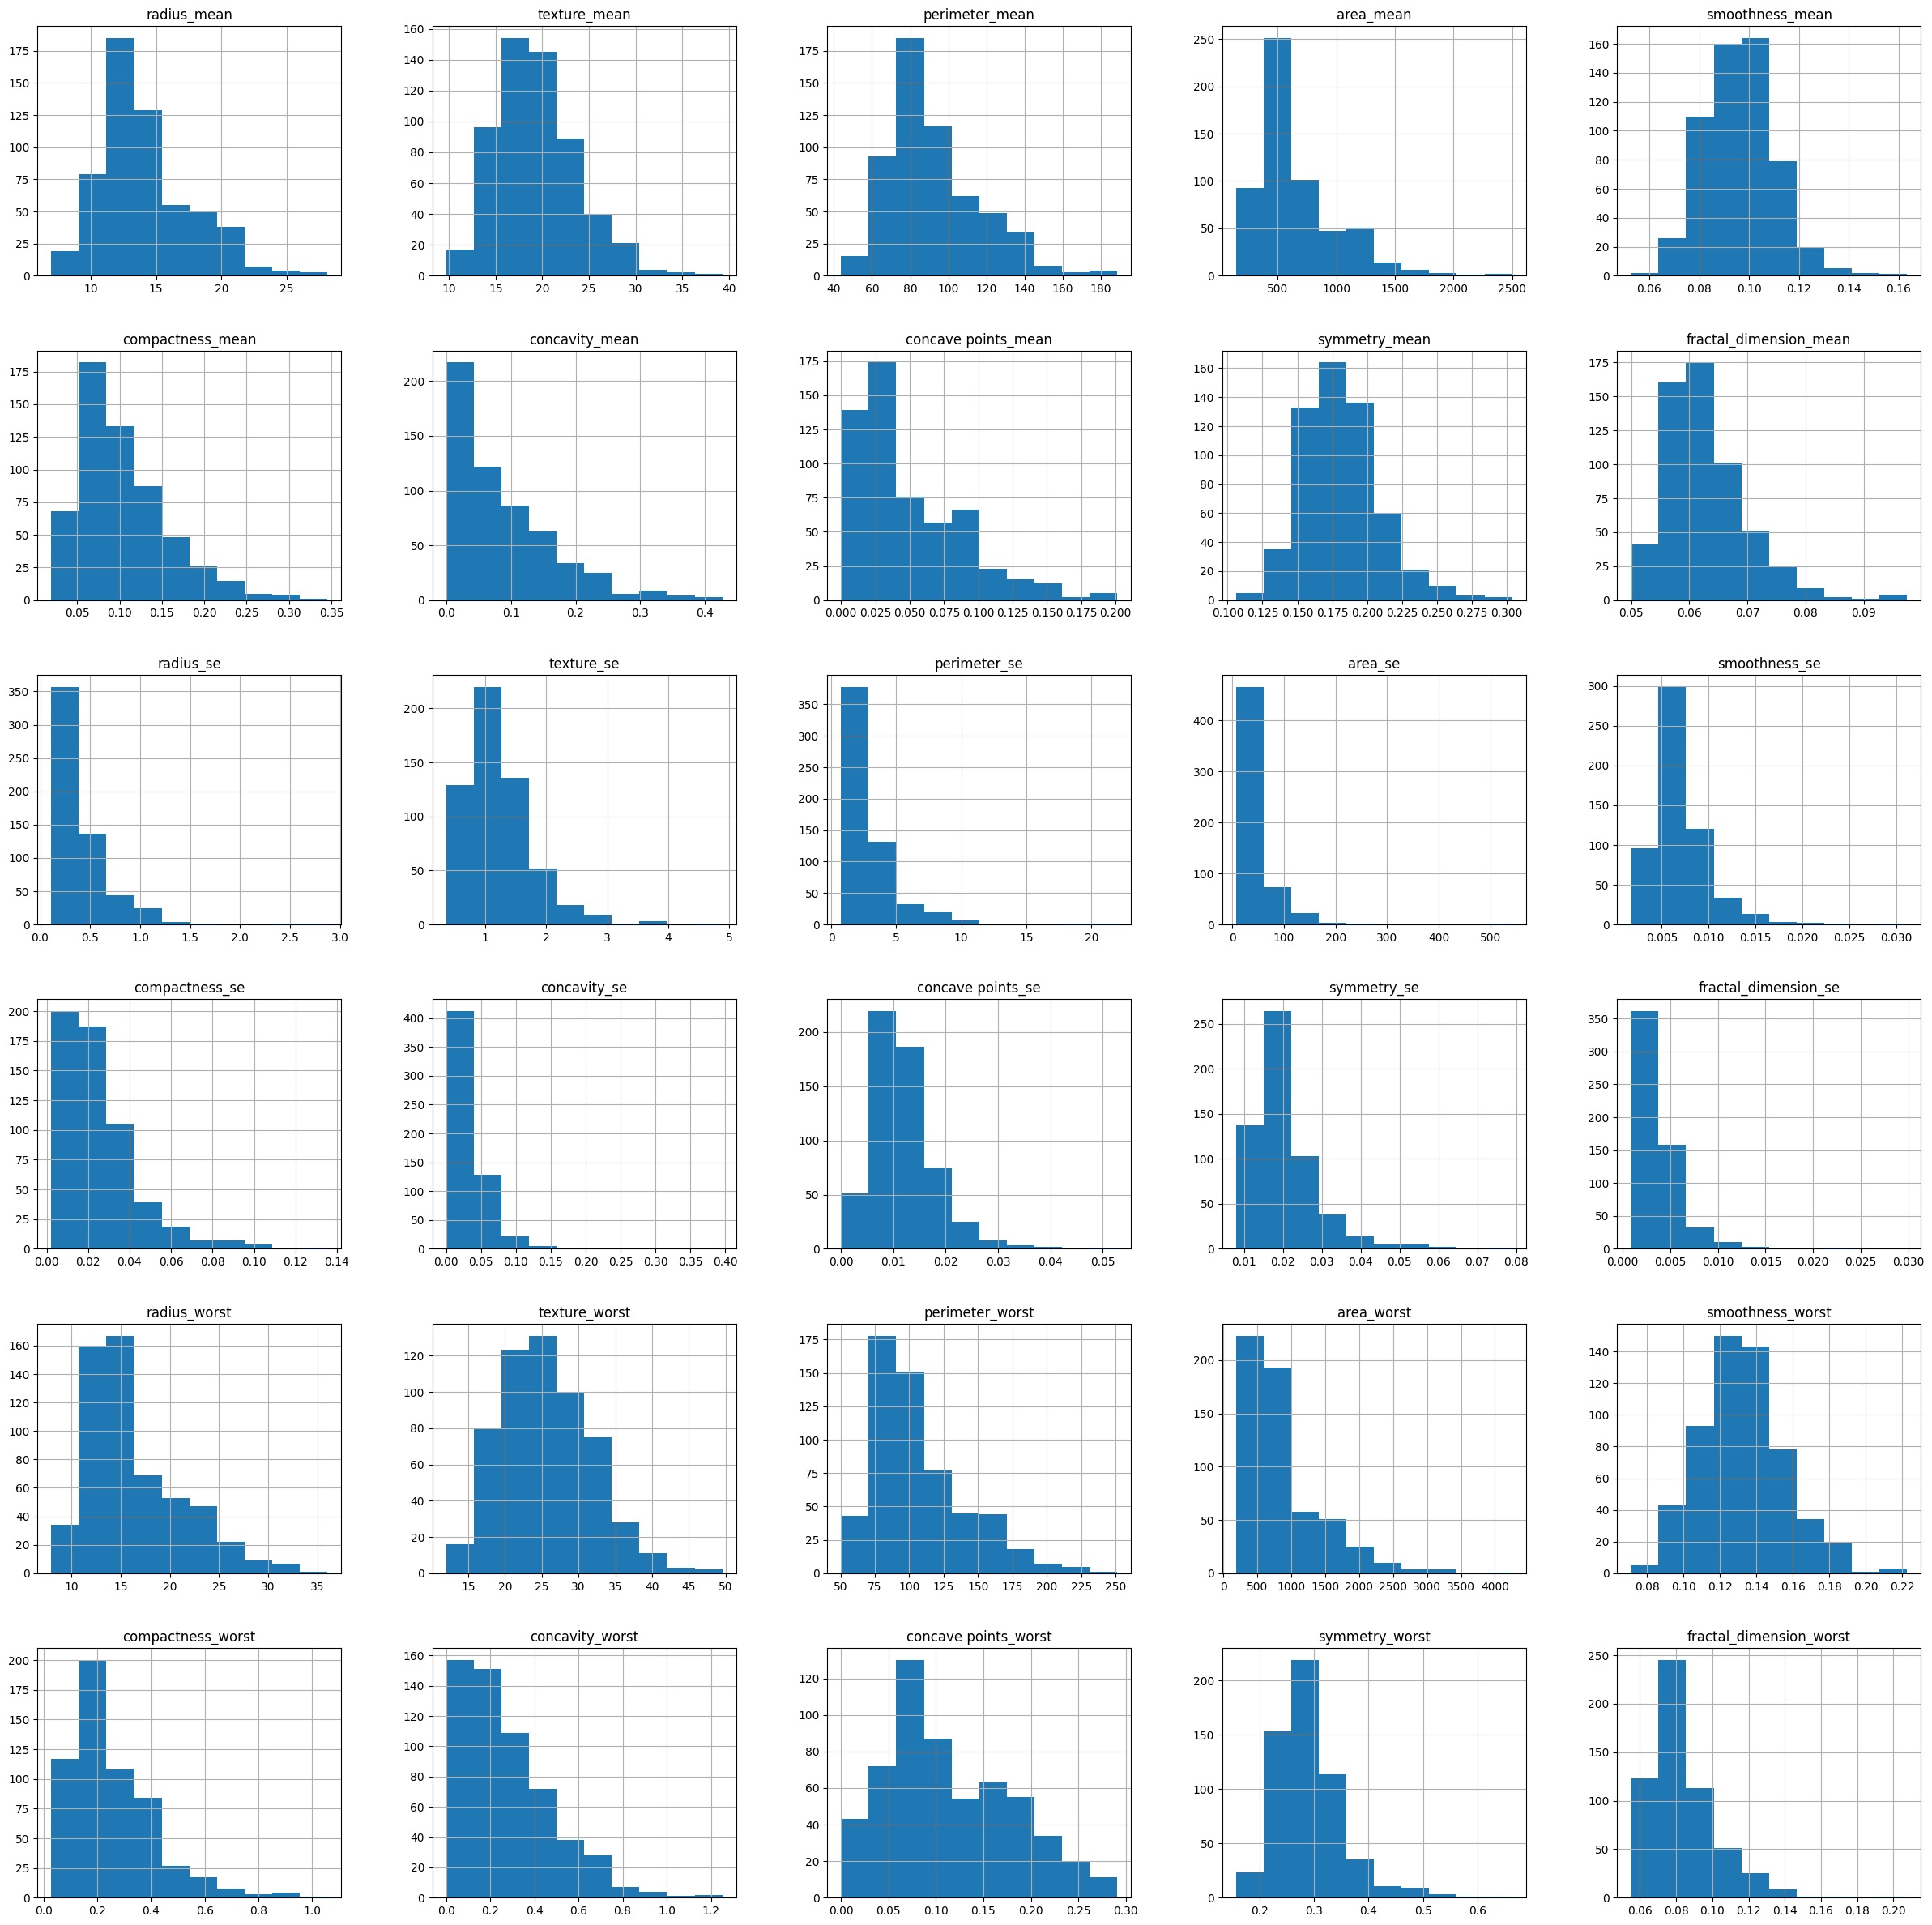

In [ ]:
df.hist(figsize=(30, 30))

--- 
### Matriz-de-Correlação:
--- 

<Axes: >

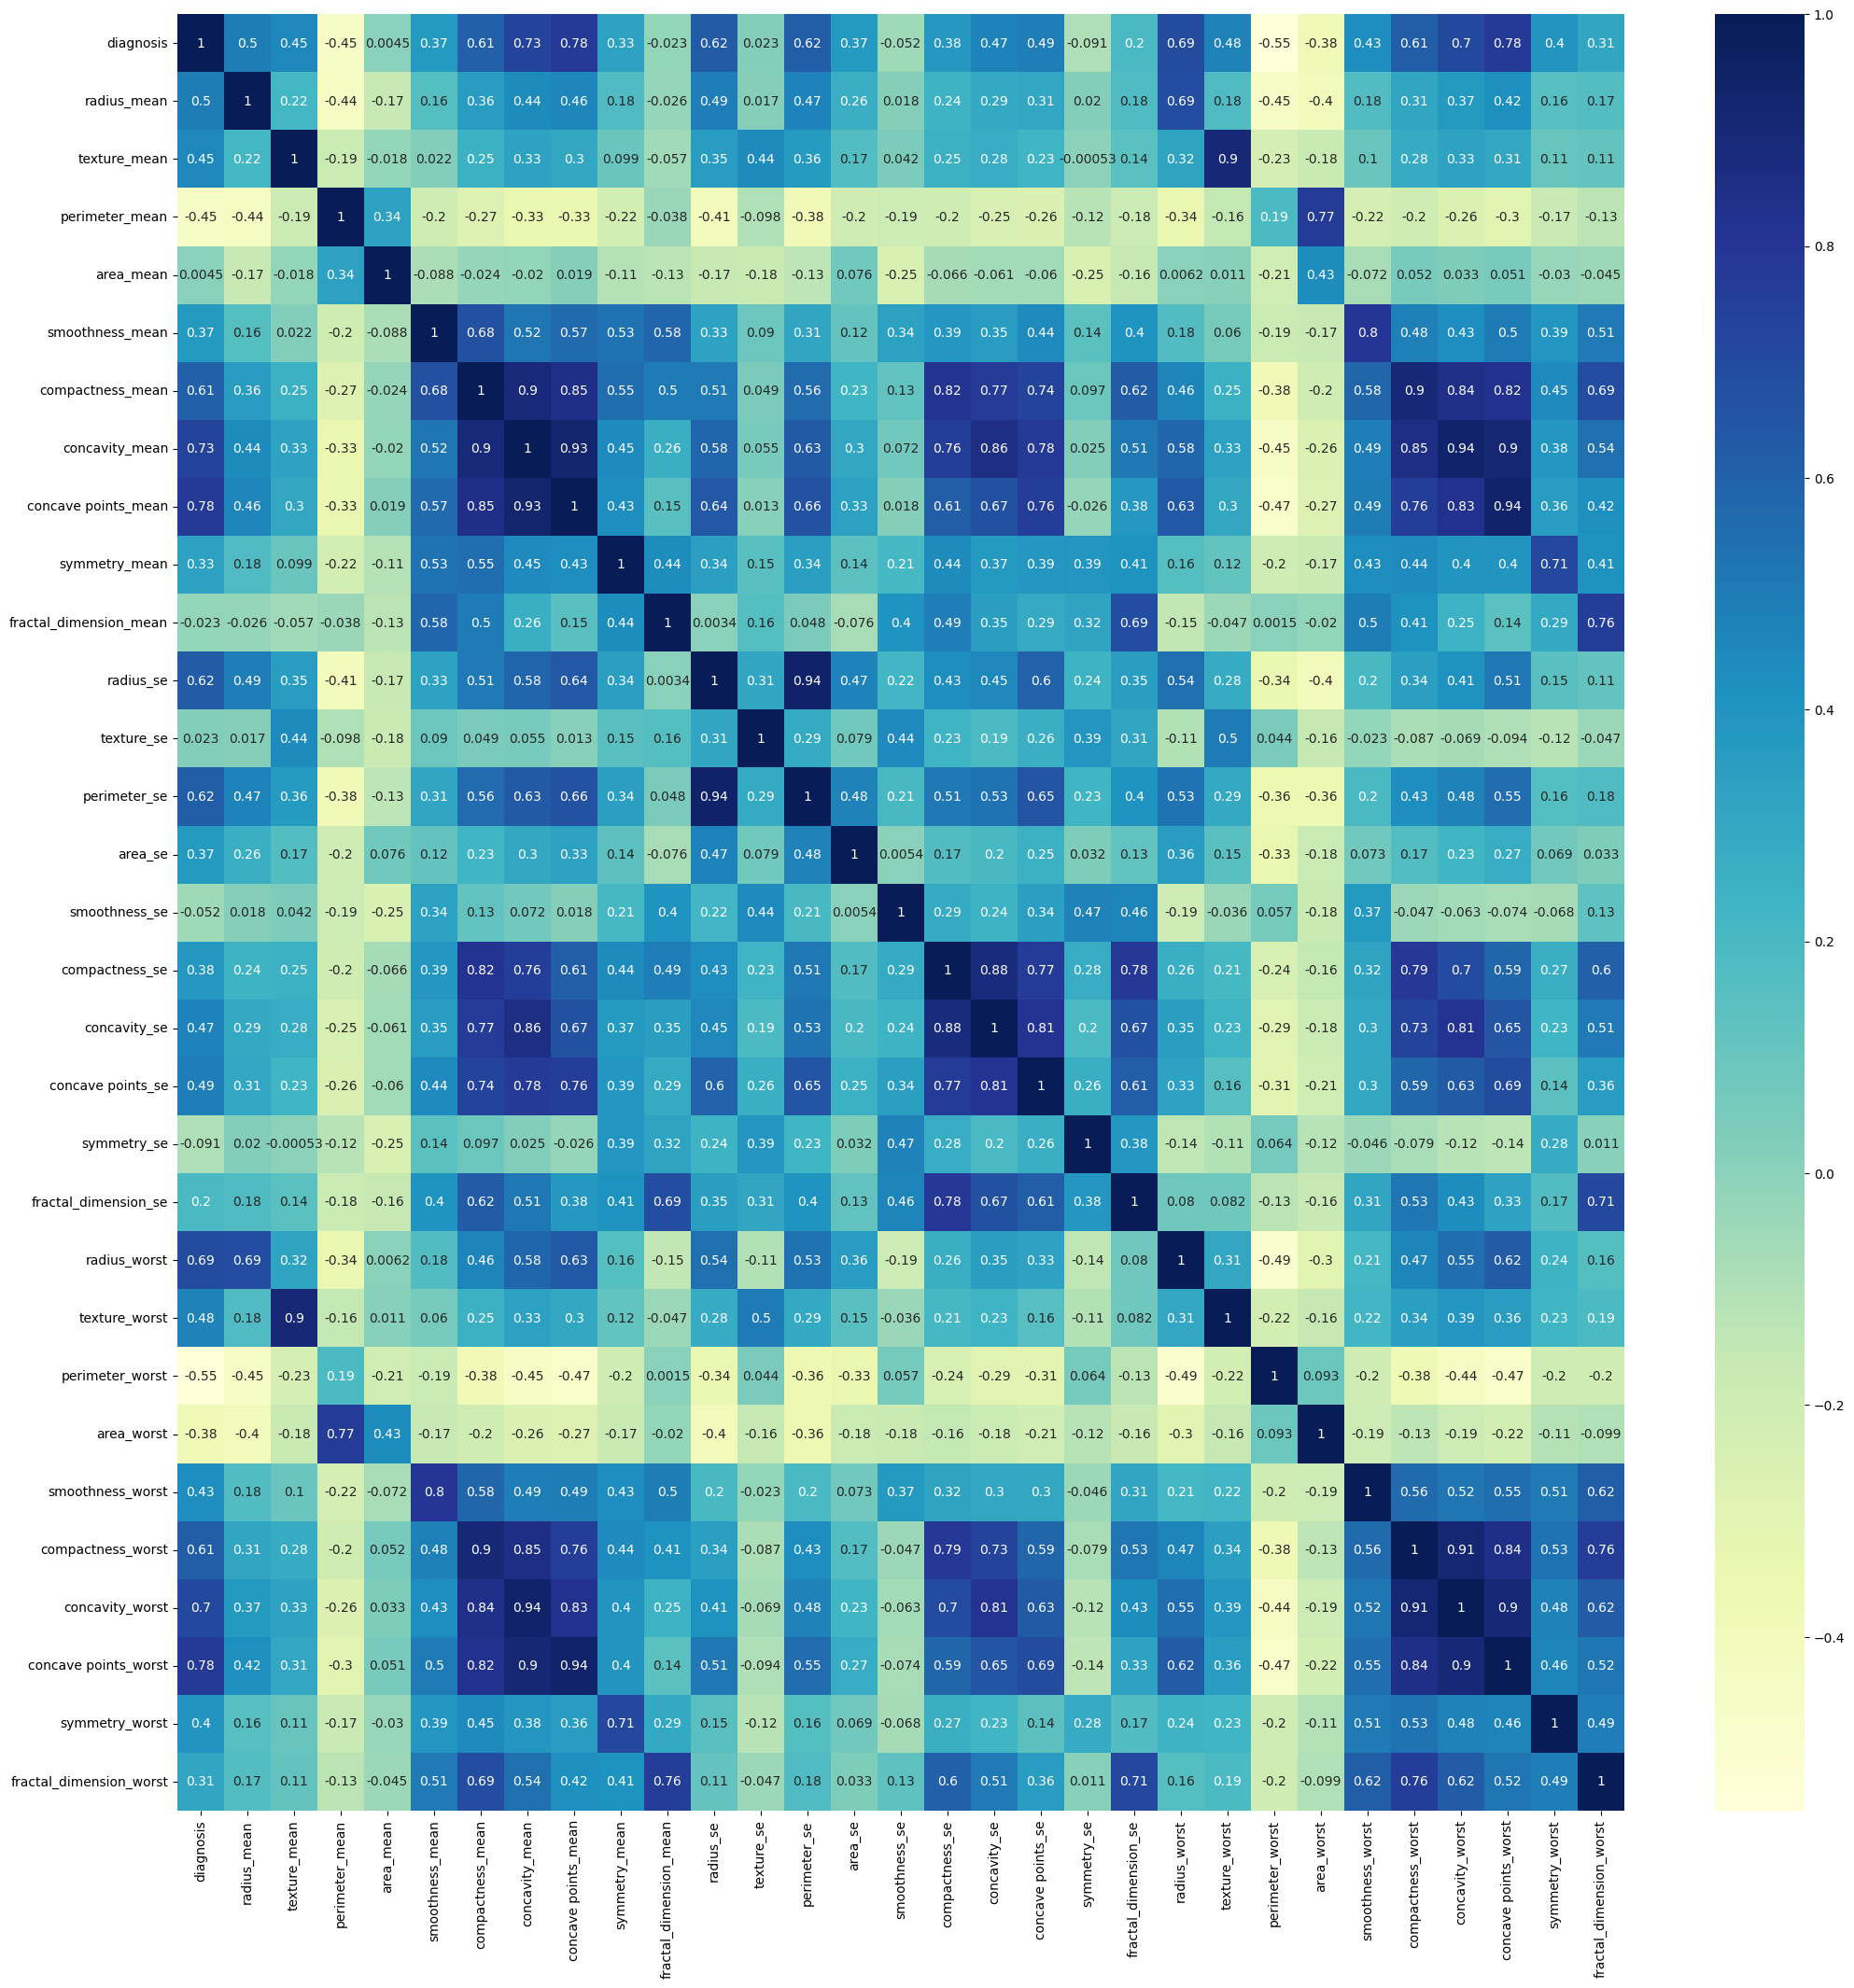

In [127]:
df_corr = df_num.corr()

plt.figure(figsize=(25,25))
sns.heatmap(data=df_corr, annot=True, cbar=True, cmap='YlGnBu')
# sns.heatmap(data=df_num.corr(), annot=False, cbar=True, cmap='coolwarm')

--- 
### Boxplot-Dataframe:
--- 

<Axes: xlabel='diagnosis', ylabel='area_mean'>

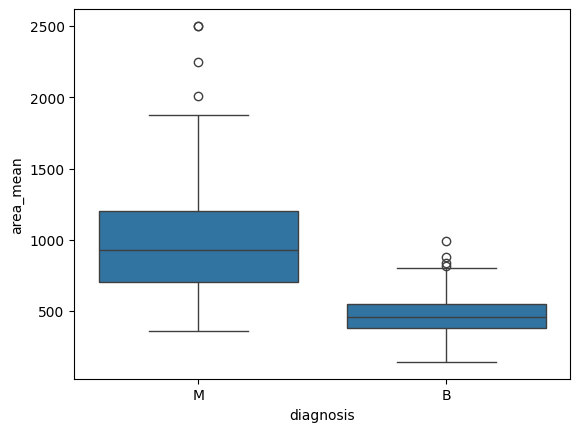

In [120]:
# plt.figure(figsize=(15,15))
sns.boxplot(data=df, x='diagnosis', y='area_mean')

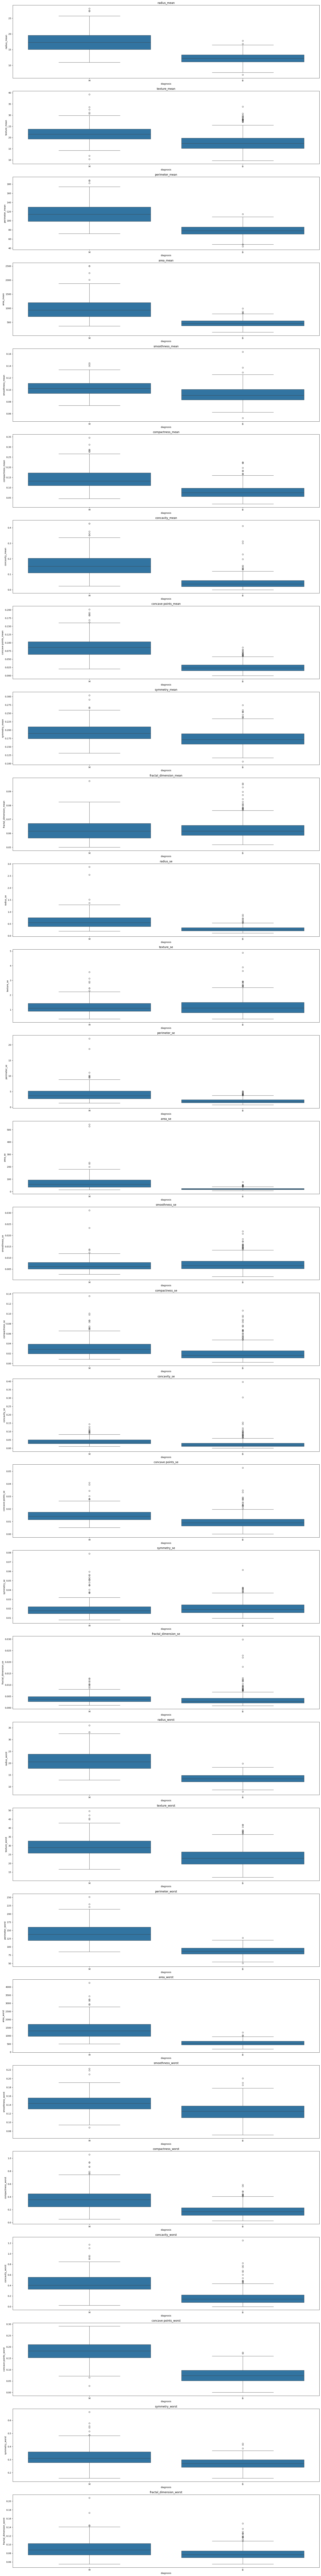

In [130]:
# Plotar boxplots de todas as features por diagnóstico
num_cols = df.select_dtypes(include='float64').columns

plt.figure(figsize=(20, 160))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()